In [1]:
#Import all libraries
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,balanced_accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")
#Please ignore the warnings with version change

In [2]:
#Read training data file

trainfile = '/Users/seeratchhabra/Desktop/MSBA/Data_508/Assignment_2/Insurance_Fraud_TRAIN.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = '/Users/seeratchhabra/Desktop/MSBA/Data_508/Assignment_2/Insurance_Fraud_TEST.csv'
testData = pd.read_csv(testfile)

# copy of train data and test data to perform pre processing
cpy_traindata = trainData.iloc[:, :-1].copy()
cpy_testdata = testData.iloc[:, :-1].copy()

trainData.head()

MONTH  WEEKOFMONTH  DAYOFWEEK     MAKE ACCIDENTAREA DAYOFWEEKCLAIMED  \
0   Jul            3     Sunday    Honda        Rural        Wednesday   
1   Nov            5     Monday    Mazda        Urban        Wednesday   
2   Jan            1     Monday  Pontiac        Urban        Wednesday   
3   Dec            1     Monday   Toyota        Rural          Tuesday   
4   Dec            5  Wednesday  Pontiac        Urban        Wednesday   

  MONTHCLAIMED  WEEKOFMONTHCLAIMED   SEX MARITALSTATUS  ...  \
0          Jan                   4  Male       Married  ...   
1          Dec                   1  Male        Single  ...   
2          Jan                   1  Male       Married  ...   
3          May                   3  Male       Married  ...   
4          Jan                   1  Male        Single  ...   

   AGEOFPOLICYHOLDER POLICEREPORTFILED WITNESSPRESENT AGENTTYPE  \
0           26_to_30                No             No  External   
1            over_65                No             No  External   
2           41_to_50                No             No  External   
3           36_to_40                No             No  External   
4           36_to_40                No             No  External   

  NUMBEROFSUPPLIMENTS  ADDRESSCHANGE_CLAIM  NUMBEROFCARS  YEAR  BASEPOLICY  \
0              3_to_5            no_change     1-vehicle  1994   Collision   
1                none            no_change     1-vehicle  1994  All_Perils   
2                none       under_6_months     1-vehicle  1994  All_Perils   
3         more_than_5       under_6_months    2-vehicles  1994  All_Perils   
4         more_than_5            no_change     1-vehicle  1994   Collision   

  FRAUDFOUND  
0        Yes  
1        Yes  
2        Yes  
3        Yes  
4        Yes  

[5 rows x 32 columns]

In [3]:
# check if same columns are present in Train and Test Data 
trainData.columns.difference(testData.columns)
# All should be same

Index([], dtype='object')

In [4]:
#Shape and data types of data
print("Training Data shape:",trainData.shape)
print("Test Data shape:",testData.shape)
print("Training Data types:",trainData.dtypes)
# variable data types
trainData.describe()

Training Data shape: (2999, 32)
Test Data shape: (12918, 32)
Training Data types: MONTH                   object
WEEKOFMONTH              int64
DAYOFWEEK               object
MAKE                    object
ACCIDENTAREA            object
DAYOFWEEKCLAIMED        object
MONTHCLAIMED            object
WEEKOFMONTHCLAIMED       int64
SEX                     object
MARITALSTATUS           object
AGE                      int64
FAULT                   object
POLICYTYPE              object
VEHICLECATEGORY         object
VEHICLEPRICE            object
REPNUMBER                int64
DEDUCTIBLE               int64
DRIVERRATING             int64
DAYS_POLICY_ACCIDENT    object
DAYS_POLICY_CLAIM       object
PASTNUMBEROFCLAIMS      object
AGEOFVEHICLE            object
AGEOFPOLICYHOLDER       object
POLICEREPORTFILED       object
WITNESSPRESENT          object
AGENTTYPE               object
NUMBEROFSUPPLIMENTS     object
ADDRESSCHANGE_CLAIM     object
NUMBEROFCARS            object
YEAR               

WEEKOFMONTH  WEEKOFMONTHCLAIMED          AGE    REPNUMBER   DEDUCTIBLE  \
count  2999.000000         2999.000000  2999.000000  2999.000000  2999.000000   
mean      2.781260            2.671224    40.055352     8.511837   407.302434   
std       1.286055            1.261614    13.497026     4.601437    41.847258   
min       1.000000            1.000000     0.000000     1.000000   300.000000   
25%       2.000000            2.000000    31.000000     4.000000   400.000000   
50%       3.000000            3.000000    38.000000     9.000000   400.000000   
75%       4.000000            4.000000    49.000000    12.000000   400.000000   
max       5.000000            5.000000    80.000000    16.000000   700.000000   

       DRIVERRATING         YEAR  
count   2999.000000  2999.000000  
mean       2.496832  1995.114038  
std        1.118365     0.606007  
min        1.000000  1994.000000  
25%        1.000000  1995.000000  
50%        2.000000  1995.000000  
75%        3.000000  1995.000000  
max        4.000000  1996.000000

In [91]:
#change data types of variables which are not numerical
trainData["YEAR"] = trainData["YEAR"].astype("str")
trainData["WEEKOFMONTH"] = trainData["WEEKOFMONTH"].astype("str")
trainData["WEEKOFMONTHCLAIMED"] = trainData["WEEKOFMONTHCLAIMED"].astype("str")
trainData["REPNUMBER"] = trainData["REPNUMBER"].astype("str")
trainData["DRIVERRATING"] = trainData["DRIVERRATING"].astype("str")
trainData.describe()

AGE   DEDUCTIBLE   FRAUDFOUND
count  2999.000000  2999.000000  2999.000000
mean     40.055352   407.302434     0.133044
std      13.497026    41.847258     0.339679
min       0.000000   300.000000     0.000000
25%      31.000000   400.000000     0.000000
50%      38.000000   400.000000     0.000000
75%      49.000000   400.000000     0.000000
max      80.000000   700.000000     1.000000

In [6]:
trainData.dtypes

MONTH                   object
WEEKOFMONTH             object
DAYOFWEEK               object
MAKE                    object
ACCIDENTAREA            object
DAYOFWEEKCLAIMED        object
MONTHCLAIMED            object
WEEKOFMONTHCLAIMED      object
SEX                     object
MARITALSTATUS           object
AGE                      int64
FAULT                   object
POLICYTYPE              object
VEHICLECATEGORY         object
VEHICLEPRICE            object
REPNUMBER               object
DEDUCTIBLE               int64
DRIVERRATING            object
DAYS_POLICY_ACCIDENT    object
DAYS_POLICY_CLAIM       object
PASTNUMBEROFCLAIMS      object
AGEOFVEHICLE            object
AGEOFPOLICYHOLDER       object
POLICEREPORTFILED       object
WITNESSPRESENT          object
AGENTTYPE               object
NUMBEROFSUPPLIMENTS     object
ADDRESSCHANGE_CLAIM     object
NUMBEROFCARS            object
YEAR                    object
BASEPOLICY              object
FRAUDFOUND              object
dtype: o

-----------------------------
MONTH
Apr    8.602868
Aug    6.902301
Dec    8.469490
Feb    9.036345
Jan    8.802934
Jul    8.036012
Jun    7.735912
Mar    9.736579
May    8.236079
Nov    8.169390
Oct    8.302768
Sep    7.969323
Name: MONTH, dtype: float64


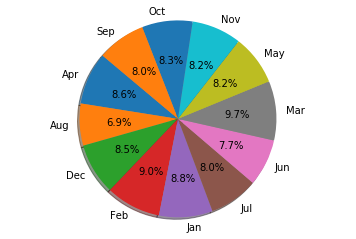

-----------------------------
DAYOFWEEK
Friday       15.505168
Monday       16.638880
Saturday     13.804602
Sunday       10.903635
Thursday     14.471490
Tuesday      14.904968
Wednesday    13.771257
Name: DAYOFWEEK, dtype: float64


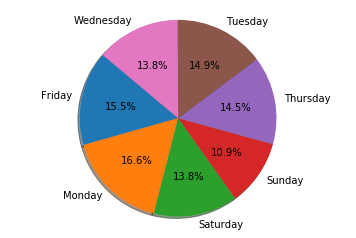

-----------------------------
MAKE
Accura        2.867623
BMW           0.066689
Chevrolet    10.470157
Dodge         0.633545
Ford          2.900967
Honda        17.872624
Mazda        15.738580
Mecedes       0.033344
Mercury       0.533511
Nisson        0.200067
Pontiac      24.274758
Porche        0.033344
Saab          0.600200
Saturn        0.400133
Toyota       21.740580
VW            1.633878
Name: MAKE, dtype: float64


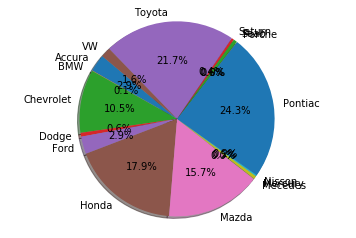

-----------------------------
ACCIDENTAREA
Rural    10.203401
Urban    89.796599
Name: ACCIDENTAREA, dtype: float64


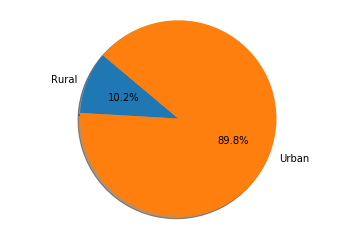

-----------------------------
DAYOFWEEKCLAIMED
Friday       16.672224
Monday       23.574525
Saturday      0.900300
Sunday        0.200067
Thursday     17.372457
Tuesday      21.773925
Wednesday    19.506502
Name: DAYOFWEEKCLAIMED, dtype: float64


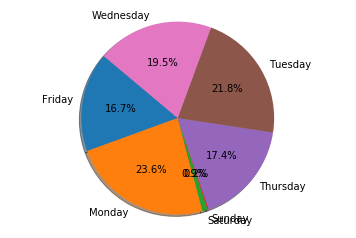

-----------------------------
MONTHCLAIMED
Apr    8.669557
Aug    6.768923
Dec    7.635879
Feb    9.136379
Jan    8.936312
Jul    7.869290
Jun    7.902634
Mar    9.236412
May    8.669557
Nov    8.402801
Oct    9.036345
Sep    7.735912
Name: MONTHCLAIMED, dtype: float64


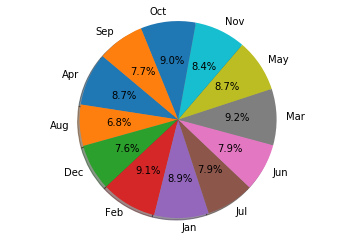

-----------------------------
SEX
Female    15.638546
Male      84.361454
Name: SEX, dtype: float64


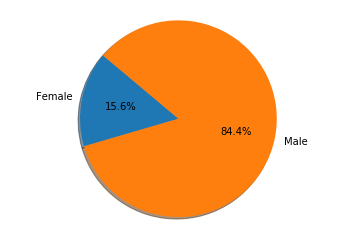

-----------------------------
MARITALSTATUS
Divorced     0.466822
Married     69.223074
Single      30.143381
Widow        0.166722
Name: MARITALSTATUS, dtype: float64


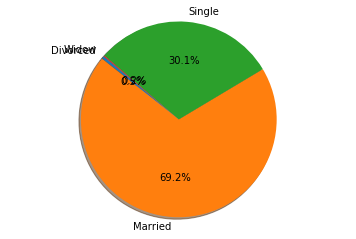

-----------------------------
FAULT
Policy_Holder    75.758586
Third_Party      24.241414
Name: FAULT, dtype: float64


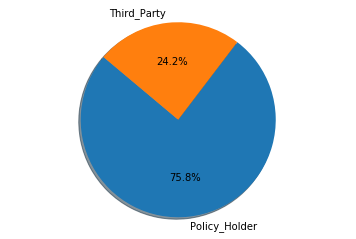

-----------------------------
POLICYTYPE
Sedan-All_Perils      28.309436
Sedan-Collision       34.544848
Sedan-Liability       32.010670
Sport-All_Perils       0.066689
Sport-Collision        2.334111
Utility-All_Perils     2.400800
Utility-Collision      0.166722
Utility-Liability      0.166722
Name: POLICYTYPE, dtype: float64


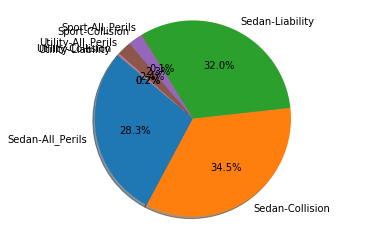

-----------------------------
VEHICLECATEGORY
Sedan      62.854285
Sport      34.411470
Utility     2.734245
Name: VEHICLECATEGORY, dtype: float64


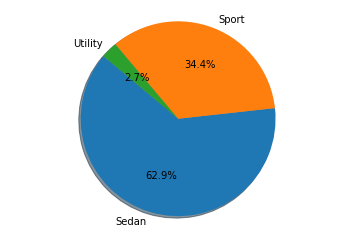

-----------------------------
VEHICLEPRICE
20000_to_29000     50.950317
30000_to_39000     23.174391
40000_to_59000      2.834278
60000_to_69000      0.533511
less_than_20000     8.236079
more_than_69000    14.271424
Name: VEHICLEPRICE, dtype: float64


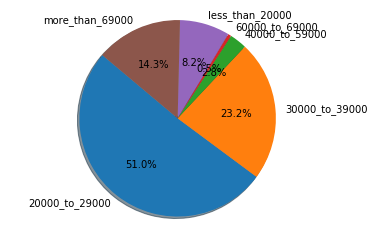

-----------------------------
DAYS_POLICY_ACCIDENT
15_to_30         0.166722
1_to_7           0.100033
8_to_15          0.400133
more_than_30    98.999667
none             0.333444
Name: DAYS_POLICY_ACCIDENT, dtype: float64


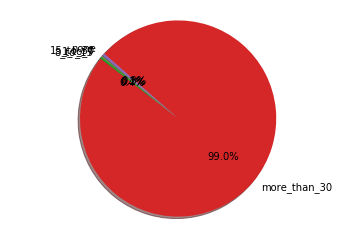

-----------------------------
DAYS_POLICY_CLAIM
15_to_30         0.133378
8_to_15          0.200067
more_than_30    99.666556
Name: DAYS_POLICY_CLAIM, dtype: float64


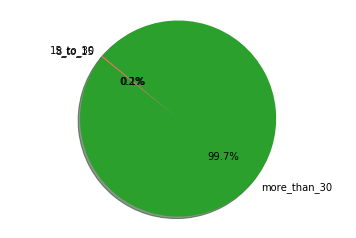

-----------------------------
PASTNUMBEROFCLAIMS
1              23.341114
2_to_4         34.678226
more_than_4    13.004335
none           28.976325
Name: PASTNUMBEROFCLAIMS, dtype: float64


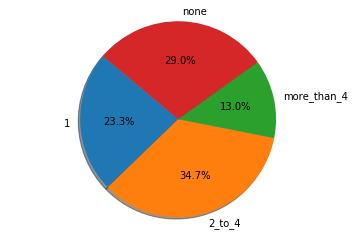

-----------------------------
AGEOFVEHICLE
2_years         0.400133
3_years         1.133711
4_years         1.567189
5_years         8.569523
6_years        22.540847
7_years        37.345782
more_than_7    25.975325
new             2.467489
Name: AGEOFVEHICLE, dtype: float64


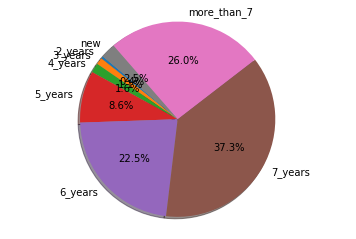

-----------------------------
AGEOFPOLICYHOLDER
16_to_17     2.200734
18_to_20     0.066689
21_to_25     0.666889
26_to_30     3.467823
31_to_35    35.945315
36_to_40    25.675225
41_to_50    19.506502
51_to_65     9.203068
over_65      3.267756
Name: AGEOFPOLICYHOLDER, dtype: float64


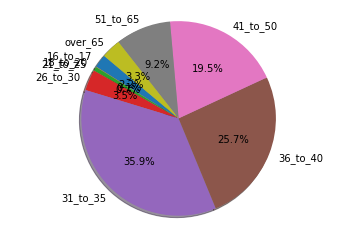

-----------------------------
POLICEREPORTFILED
No     97.032344
Yes     2.967656
Name: POLICEREPORTFILED, dtype: float64


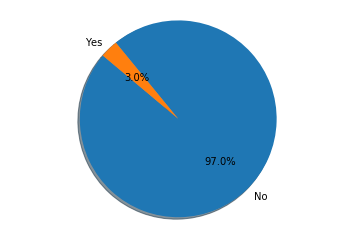

-----------------------------
WITNESSPRESENT
No     99.333111
Yes     0.666889
Name: WITNESSPRESENT, dtype: float64


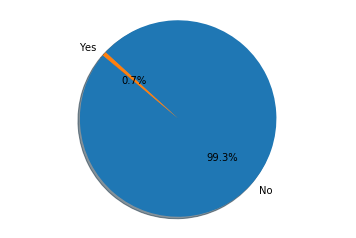

-----------------------------
AGENTTYPE
External    98.666222
Internal     1.333778
Name: AGENTTYPE, dtype: float64


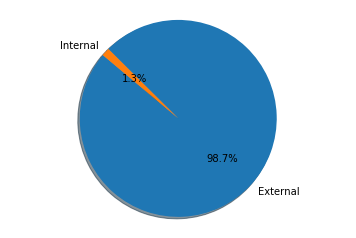

-----------------------------
NUMBEROFSUPPLIMENTS
1_to_2         15.971991
3_to_5         12.637546
more_than_5    25.808603
none           45.581861
Name: NUMBEROFSUPPLIMENTS, dtype: float64


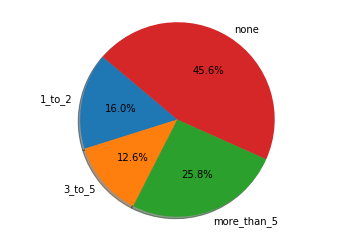

-----------------------------
ADDRESSCHANGE_CLAIM
1_year             1.233745
2_to_3_years       2.234078
4_to_8_years       4.401467
no_change         92.064021
under_6_months     0.066689
Name: ADDRESSCHANGE_CLAIM, dtype: float64


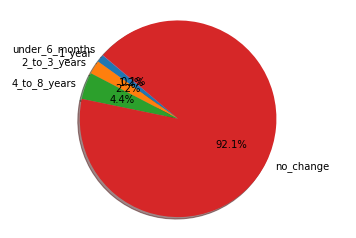

-----------------------------
NUMBEROFCARS
1-vehicle     92.564188
2-vehicles     5.068356
3_to_4         2.334111
5_to_8         0.033344
Name: NUMBEROFCARS, dtype: float64


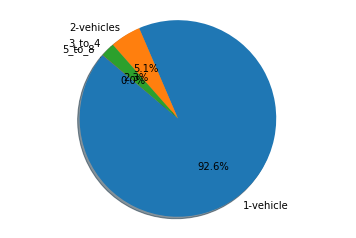

-----------------------------
BASEPOLICY
All_Perils    30.776926
Collision     37.045682
Liability     32.177392
Name: BASEPOLICY, dtype: float64


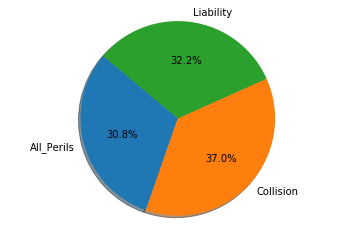

-----------------------------
REPNUMBER
1     6.268756
10    6.735579
11    6.335445
12    6.402134
13    6.168723
14    5.635212
15    6.435478
16    6.402134
2     5.735245
3     6.702234
4     6.402134
5     6.102034
6     5.535178
7     7.302434
8     5.568523
9     6.268756
Name: REPNUMBER, dtype: float64


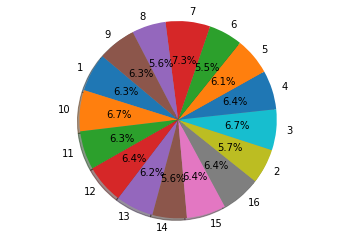

-----------------------------
YEAR
1994    13.304435
1995    61.987329
1996    24.708236
Name: YEAR, dtype: float64


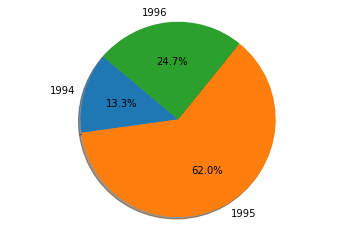

-----------------------------
DRIVERRATING
1    25.141714
2    24.908303
3    25.075025
4    24.874958
Name: DRIVERRATING, dtype: float64


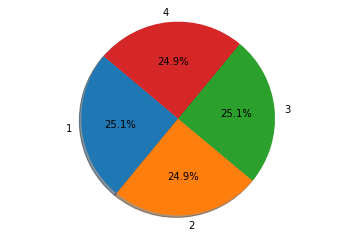

-----------------------------
WEEKOFMONTH
1    20.373458
2    24.074692
3    23.407803
4    21.340447
5    10.803601
Name: WEEKOFMONTH, dtype: float64


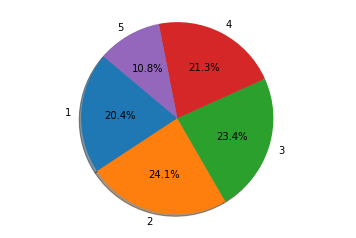

-----------------------------
WEEKOFMONTHCLAIMED
1    23.207736
2    23.607869
3    24.208069
4    20.806936
5     8.169390
Name: WEEKOFMONTHCLAIMED, dtype: float64


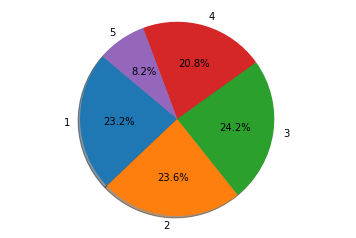

In [7]:
#summary of categorical variables in training data
categoricalFeatures = ["MONTH", "DAYOFWEEK", "MAKE", "ACCIDENTAREA","DAYOFWEEKCLAIMED","MONTHCLAIMED", 
                       'SEX', "MARITALSTATUS", "FAULT","POLICYTYPE",'VEHICLECATEGORY',"VEHICLEPRICE" ,'DAYS_POLICY_ACCIDENT',
                      "DAYS_POLICY_CLAIM", "PASTNUMBEROFCLAIMS", "AGEOFVEHICLE", "AGEOFPOLICYHOLDER", "POLICEREPORTFILED"
                      ,"WITNESSPRESENT", "AGENTTYPE", "NUMBEROFSUPPLIMENTS", "ADDRESSCHANGE_CLAIM","NUMBEROFCARS",
                      "BASEPOLICY", "REPNUMBER","YEAR","DRIVERRATING", "WEEKOFMONTH", "WEEKOFMONTHCLAIMED"]
for col in categoricalFeatures:
    print("-----------------------------")
    print(trainData.groupby(col)[col].count()/len(trainData) * 100)
    df = pd.DataFrame(trainData.groupby(col)[col].count()/len(trainData) * 100)
    labels = df.index
    sizes = df[col]
    # Plot
    plt.pie(sizes, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

In [8]:
# Percentage split of target variable
per_split = pd.DataFrame(trainData.groupby('FRAUDFOUND')['FRAUDFOUND'].count())
per_split['FRAUDFOUND_PER'] = 100*per_split['FRAUDFOUND']/trainData.shape[0]
per_split
# unbalanced dataset

FRAUDFOUND  FRAUDFOUND_PER
FRAUDFOUND                            
No                2600       86.695565
Yes                399       13.304435

In [9]:
# check if there are any missing values in any column
print("Number of null values in train data",trainData.isnull().sum().sum())
print("Number of null values in test data",testData.isnull().sum().sum())
# no missing values

Number of null values in train data 0
Number of null values in test data 0


In [10]:
# drop column policy type already part of base policy and vehicle category
cpy_traindata.drop("POLICYTYPE", axis=1, inplace=True)
cpy_testdata.drop("POLICYTYPE", axis=1, inplace=True)

In [11]:
#List of Categorical Features
categoricalFeatures = ["MONTH", "DAYOFWEEK", "MAKE", "ACCIDENTAREA","DAYOFWEEKCLAIMED","MONTHCLAIMED", 
                       'SEX', "MARITALSTATUS", "FAULT",'VEHICLECATEGORY',"VEHICLEPRICE", 'DAYS_POLICY_ACCIDENT',
                      "DAYS_POLICY_CLAIM", "PASTNUMBEROFCLAIMS", "AGEOFVEHICLE", "AGEOFPOLICYHOLDER", "POLICEREPORTFILED"
                      ,"WITNESSPRESENT", "AGENTTYPE", "NUMBEROFSUPPLIMENTS", "ADDRESSCHANGE_CLAIM","NUMBEROFCARS",
                      "BASEPOLICY", "REPNUMBER","YEAR","DRIVERRATING", "WEEKOFMONTH", "WEEKOFMONTHCLAIMED"]

#Combine Train and test for one Hot Encoding
combined_Data = pd.concat([cpy_traindata,cpy_testdata], keys=[0,1])

#Do one Hot encoding for categorical features
combined_Data = pd.get_dummies(combined_Data,columns=categoricalFeatures)

#Separate Train data and test data
X_train = combined_Data.xs(0)
X_test = combined_Data.xs(1)

print("Test data",X_test.shape)
print("Training data", X_train.shape)

Test data (12918, 163)
Training data (2999, 163)


In [12]:
# change yes and no in Target column (y) to 1 and 0 respectively
trainData['FRAUDFOUND'] = trainData['FRAUDFOUND'].map({'Yes': 1, 'No': 0})
testData['FRAUDFOUND'] = testData['FRAUDFOUND'].map({'Yes': 1, 'No': 0})

In [13]:
# Get target column 
Y_train = trainData["FRAUDFOUND"]
Y_test = testData["FRAUDFOUND"]
print("Test data",Y_test.shape)
print("Training data", Y_train.shape)

Test data (12918,)
Training data (2999,)


In [52]:
#Make default decision tree using training dataset
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

#Prediction on training data
pred=pd.DataFrame(clf.predict(X_train),columns=["Prediction"])
print("----------------------------Decision Tree - Training Data------------------------------------------------\n")
print("Accuracy Score on training data using Decision Tree:",accuracy_score(Y_train,pred["Prediction"]))
print("Confusion Matrix on training data using Decision Tree\n", confusion_matrix(Y_train,pred["Prediction"]))

# prediction on test data
pred=pd.DataFrame(clf.predict(X_test),columns=["Prediction"])
print("----------------------------Decision Tree - Test Data------------------------------------------------\n")
print("Accuracy Score on test data using Decision Tree:",accuracy_score(Y_test,pred["Prediction"]))
print("Balanced Accuracy Score on test data using Decision Tree:",balanced_accuracy_score(Y_test,pred["Prediction"]))
print("Confusion Matrix on test data using Decision Tree\n", confusion_matrix(Y_test,pred["Prediction"]))
print("Classification report\n", classification_report(Y_test,pred["Prediction"]))

----------------------------Decision Tree - Training Data------------------------------------------------

Accuracy Score on training data using Decision Tree: 1.0
Confusion Matrix on training data using Decision Tree
 [[2600    0]
 [   0  399]]
----------------------------Decision Tree - Test Data------------------------------------------------

Accuracy Score on test data using Decision Tree: 0.8937141972441555
Balanced Accuracy Score on test data using Decision Tree: 0.8965383272219312
Confusion Matrix on test data using Decision Tree
 [[11097  1323]
 [   50   448]]
Classification report
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     12420
           1       0.25      0.90      0.39       498

   micro avg       0.89      0.89      0.89     12918
   macro avg       0.62      0.90      0.67     12918
weighted avg       0.97      0.89      0.92     12918



In [149]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
dt_feature_names = list(X_train.columns)
dt_target_names = [str(s) for s in Y_train.unique()]
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=dt_feature_names, class_names=dt_target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [84]:
#get default parameters
clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [87]:
#Hyperparameter tuning done for decision tree classifier
#RANDOM SEARCH--------------------------------------------

print("RandomizedSearchCV-Decision tree")
parameters={ 'min_samples_split' : range(5,30,5), 'criterion':['gini','entropy'], 'max_depth': range(30,120,10)}
clf_random = RandomizedSearchCV(clf,parameters,n_iter=30, cv=8,scoring ="recall")
clf_random.fit(X_train, Y_train)
rand_parm=clf_random.best_params_
print(rand_parm)

#GRID SEARCH----------------------------------------
print("GridSearchCV-Decision tree")
clf_grid = GridSearchCV(clf,parameters,scoring ="recall")
clf_grid.fit(X_train, Y_train)
grid_parm=clf_grid.best_params_
print(grid_parm)

RandomizedSearchCV-Decision tree
{'min_samples_split': 5, 'max_depth': 110, 'criterion': 'entropy'}
GridSearchCV-Decision tree
{'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 5}


In [88]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
clf_g = DecisionTreeClassifier(**grid_parm)
clf_r = DecisionTreeClassifier(**rand_parm)
#grid model
clf_g.fit(X_train,Y_train)
clf_g_predict = clf_g.predict(X_test)

# random model
clf_r.fit(X_train,Y_train)
clf_r_predict = clf_r.predict(X_test)

print("----------------------------Hypertuning using Grid Search------------------------------------------------\n")
print("----------------Training Data----------------------------------")
#Grid model Prediction on training data
pred_g=pd.DataFrame(clf_g.predict(X_train),columns=["Prediction"])
print("Accuracy Score on training data using Decision Tree - Grid Search:",accuracy_score(Y_train,pred_g["Prediction"]))
print("Confusion Matrix on training data using Decision Tree - Grid Search\n", confusion_matrix(Y_train,pred_g["Prediction"]))

# grid model prediction on test data
pred_g=pd.DataFrame(clf_g.predict(X_test),columns=["Prediction"])
print("----------------Test Data----------------------------------")
print("Accuracy Score on test data using Decision Tree - Grid Search:",accuracy_score(Y_test,pred_g["Prediction"]))
print("Balanced Accuracy Score on test data using Decision Tree - Grid Search:",balanced_accuracy_score(Y_test,pred_g["Prediction"]))
print("Confusion Matrix on test data using Decision Tree - Grid Search\n", confusion_matrix(Y_test,pred_g["Prediction"]))
print("Classification report on test data using Decision Tree - Grid Search\n", classification_report(Y_test,pred_g["Prediction"]))

print("\n--------------------------Hypertuning using Random Search------------------------------------------------\n")
print("----------------Training Data----------------------------------")
#Random model Prediction on training data
pred_r=pd.DataFrame(clf_r.predict(X_train),columns=["Prediction"])
print("Accuracy Score on training data using Decision Tree - Random Search:",accuracy_score(Y_train,pred_r["Prediction"]))
print("Confusion Matrix on training data using Decision Tree - Random Search\n", confusion_matrix(Y_train,pred_r["Prediction"]))

# Random model prediction on test data
pred_r=pd.DataFrame(clf_r.predict(X_test),columns=["Prediction"])
print("----------------Test Data----------------------------------")
print("Accuracy Score on test data using Decision Tree - Random Search:",accuracy_score(Y_test,pred_r["Prediction"]))
print("Balanced Accuracy Score on test data using Decision Tree - Random Search:",balanced_accuracy_score(Y_test,pred_r["Prediction"]))
print("Confusion Matrix on test data using Decision Tree - Random Search\n", confusion_matrix(Y_test,pred_r["Prediction"]))
print("Classification report on test data using Decision Tree - Random Search\n", classification_report(Y_test,pred_r["Prediction"]))

----------------------------Hypertuning using Grid Search------------------------------------------------

----------------Training Data----------------------------------
Accuracy Score on training data using Decision Tree - Grid Search: 0.9863287762587529
Confusion Matrix on training data using Decision Tree - Grid Search
 [[2586   14]
 [  27  372]]
----------------Test Data----------------------------------
Accuracy Score on test data using Decision Tree - Grid Search: 0.8944883108840378
Balanced Accuracy Score on test data using Decision Tree - Grid Search: 0.872846943328871
Confusion Matrix on test data using Decision Tree - Grid Search
 [[11132  1288]
 [   75   423]]
Classification report on test data using Decision Tree - Grid Search
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     12420
           1       0.25      0.85      0.38       498

   micro avg       0.89      0.89      0.89     12918
   macro avg       0.62      0.

In [89]:
# cross validation of grid search balanced accuracy
clf_cv_score_g = cross_val_score(clf_g, X_train, Y_train, cv=10, scoring="balanced_accuracy")
print(clf_cv_score_g)
print("Average balanced accuracy on training data with Grid search: ", clf_cv_score_g.mean())
print('\n')
# cross validation of random search
clf_cv_score_r = cross_val_score(clf_r, X_train, Y_train, cv=10, scoring="balanced_accuracy")
print(clf_cv_score_r)
print("Average balanced accuracy on training data with random search: ", clf_cv_score_r.mean())
print('\n')
# cross validation of default model
clf_cv_score = cross_val_score(clf, X_train, Y_train, cv=10, scoring="balanced_accuracy")
print(clf_cv_score)
print("Average balanced accuracy on training data with random search: ", clf_cv_score.mean())
print('\n')


[0.53942308 0.79519231 0.78653846 0.62115385 0.65480769 0.57884615
 0.52115385 0.54038462 0.59423077 0.68653846]
Average balanced accuracy on training data with Grid search:  0.631826923076923


[0.57788462 0.74903846 0.7375     0.65865385 0.58173077 0.55
 0.54230769 0.52019231 0.7        0.66858974]
Average balanced accuracy on training data with random search:  0.6285897435897436


[0.51538462 0.77692308 0.76538462 0.64038462 0.64711538 0.59519231
 0.55192308 0.52596154 0.59711538 0.66794872]
Average balanced accuracy on training data with random search:  0.6283333333333333




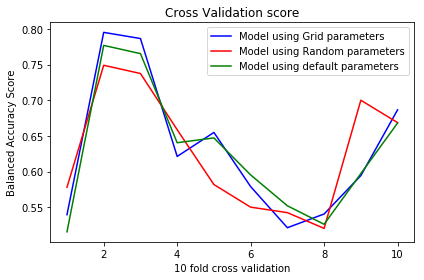

In [90]:
plt.plot([1,2,3,4,5,6,7,8,9,10], clf_cv_score_g, label="Model using Grid parameters", color="blue")
plt.plot([1,2,3,4,5,6,7,8,9,10], clf_cv_score_r, label="Model using Random parameters", color="red")
plt.plot([1,2,3,4,5,6,7,8,9,10], clf_cv_score, label="Model using default parameters", color="green")
plt.title("Cross Validation score")
plt.ylabel("Balanced Accuracy Score")
plt.xlabel("10 fold cross validation")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [36]:
#Random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

#Prediction on training data
pred=pd.DataFrame(rfc.predict(X_train),columns=["Prediction"])
print("----------------------------Random Forest: Training Data------------------------------------------------\n")
print("Accuracy Score on training data using Random Forest:",accuracy_score(Y_train,pred["Prediction"]))
print("Confusion Matrix on training data using Random Forest\n", confusion_matrix(Y_train,pred["Prediction"]))

# prediction on test data
pred=pd.DataFrame(rfc.predict(X_test),columns=["Prediction"])
print("----------------------------Random Forest: Test Data------------------------------------------------\n")
print("Accuracy Score on test data using Random Forest:",accuracy_score(Y_test,pred["Prediction"]))
print("Balanced Accuracy Score on test data using Random Forest:",balanced_accuracy_score(Y_test,pred["Prediction"]))
print("Confusion Matrix on test data using Random Forest\n", confusion_matrix(Y_test,pred["Prediction"]))
print("Classification report on test data using Random Forest\n", classification_report(Y_test,pred["Prediction"]))


----------------------------Random Forest: Training Data------------------------------------------------

Accuracy Score on training data using Random Forest: 0.9866622207402468
Confusion Matrix on training data using Random Forest
 [[2598    2]
 [  38  361]]
----------------------------Random Forest: Test Data------------------------------------------------

Accuracy Score on test data using Random Forest: 0.9537854156990246
Balanced Accuracy Score on test data using Random Forest: 0.8622426905690395
Confusion Matrix on test data using Random Forest
 [[11941   479]
 [  118   380]]
Classification report on test data using Random Forest
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     12420
           1       0.44      0.76      0.56       498

   micro avg       0.95      0.95      0.95     12918
   macro avg       0.72      0.86      0.77     12918
weighted avg       0.97      0.95      0.96     12918



In [102]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
#Hyperparameter tuning done for random forest classifier
#RANDOM SEARCH--------------------------------------------

print("RandomizedSearchCV-Decision tree")
parameters={'max_features': range(50,163,10) ,'n_estimators':[60,70,80,90], 'criterion':['gini','entropy'],'max_depth': range(10,100,10)}
rfc_random = RandomizedSearchCV(rfc,parameters,n_iter=30,cv=5, scoring="recall")
rfc_random.fit(X_train, Y_train)
rand_parm_rfc=rfc_random.best_params_
print(rand_parm_rfc)

#GRID SEARCH----------------------------------------
print("GridSearchCV-Decision tree")
rfc_grid = GridSearchCV(rfc,parameters,scoring="recall")
rfc_grid.fit(X_train, Y_train)
grid_parm_rfc=rfc_grid.best_params_
print(grid_parm_rfc)

RandomizedSearchCV-Decision tree
{'n_estimators': 80, 'max_features': 120, 'max_depth': 40, 'criterion': 'entropy'}
GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 70, 'max_features': 120, 'n_estimators': 70}


In [42]:
#Using the parameters obtained from HyperParameterTuning in the randomforestclassifier
rfc_g = RandomForestClassifier(**grid_parm_rfc)
rfc_r = RandomForestClassifier(**rand_parm_rfc)
#grid model
rfc_g.fit(X_train,Y_train)
rfc_g_predict = rfc_g.predict(X_test)

# random model
rfc_r.fit(X_train,Y_train)
rfc_r_predict = rfc_r.predict(X_test)

print("----------------------------Hypertuning using Grid Search------------------------------------------------\n")
print("----------------Training Data----------------------------------")
#Grid model Prediction on training data
pred_g_rfc=pd.DataFrame(rfc_g.predict(X_train),columns=["Prediction"])
print("Accuracy Score on training data using Random Forest - Grid Search:",accuracy_score(Y_train,pred_g_rfc["Prediction"]))
print("Confusion Matrix on training data using Random Forest - Grid Search\n", confusion_matrix(Y_train,pred_g_rfc["Prediction"]))

# grid model prediction on test data
print("----------------Test Data----------------------------------")
pred_g_rfc=pd.DataFrame(rfc_g.predict(X_test),columns=["Prediction"])
print("Accuracy Score on test data using Random Forest - Grid Search:",accuracy_score(Y_test,pred_g_rfc["Prediction"]))
print("Balanced Accuracy Score on test data using Random Forest:",balanced_accuracy_score(Y_test,pred_g_rfc["Prediction"]))
print("Confusion Matrix on test data using Random Forest - Grid Search\n", confusion_matrix(Y_test,pred_g_rfc["Prediction"]))
print("Classification report on test data using Random Forest - Grid Search\n", classification_report(Y_test,pred_g_rfc["Prediction"]))


print("\n--------------------------Hypertuning using Random Search------------------------------------------------\n")
print("----------------Training Data----------------------------------")
#Random model Prediction on training data
pred_r_rfc=pd.DataFrame(rfc_r.predict(X_train),columns=["Prediction"])
print("Accuracy Score on training data using Random Forest - Random Search:",accuracy_score(Y_train,pred_r_rfc["Prediction"]))
print("Confusion Matrix on training data using Random Forest - Random Search\n", confusion_matrix(Y_train,pred_r_rfc["Prediction"]))


# Random model prediction on test data
print("----------------Test Data----------------------------------")
pred_r_rfc=pd.DataFrame(rfc_r.predict(X_test),columns=["Prediction"])
print("Accuracy Score on test data using Random Forest - Random Search:",accuracy_score(Y_test,pred_r_rfc["Prediction"]))
print("Balanced Accuracy Score on test data using Random Forest:",balanced_accuracy_score(Y_test,pred_r_rfc["Prediction"]))
print("Confusion Matrix on test data using Random Forest - Random Search\n", confusion_matrix(Y_test,pred_r_rfc["Prediction"]))
print("Classification report on test data using Random Forest - Random Search\n", classification_report(Y_test,pred_r_rfc["Prediction"]))


----------------------------Hypertuning using Grid Search------------------------------------------------

----------------Training Data----------------------------------
Accuracy Score on training data using Random Forest - Grid Search: 0.9996665555185061
Confusion Matrix on training data using Random Forest - Grid Search
 [[2599    1]
 [   0  399]]
----------------Test Data----------------------------------
Accuracy Score on test data using Random Forest - Grid Search: 0.9296330701346958
Balanced Accuracy Score on test data using Random Forest: 0.9017252585220108
Confusion Matrix on test data using Random Forest - Grid Search
 [[11575   845]
 [   64   434]]
Classification report on test data using Random Forest - Grid Search
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     12420
           1       0.34      0.87      0.49       498

   micro avg       0.93      0.93      0.93     12918
   macro avg       0.67      0.90      0.73 

In [94]:
## cross validation of grid search balanced accuracy
rfc_cv_score_g = cross_val_score(rfc_g, X_train, Y_train, cv=10,scoring="balanced_accuracy")
print(rfc_cv_score_g)
print("Average Balance accuracy on test data with Grid search: ", rfc_cv_score_g.mean())
print('\n')
# cross validation of random search
rfc_cv_score_r = cross_val_score(rfc_r, X_train, Y_train, cv=10, scoring="balanced_accuracy")
print(rfc_cv_score_r)
print("Average Balance accuracy on test data with random search: ", rfc_cv_score_r.mean())
print('\n')
# cross validation of default model
rfc_cv_score = cross_val_score(rfc, X_train, Y_train, cv=10, scoring="balanced_accuracy")
print(rfc_cv_score)
print("Average precision on training data with default model: ", rfc_cv_score.mean())
print('\n')

[0.58461538 0.75961538 0.77019231 0.68557692 0.61057692 0.51538462
 0.48653846 0.5        0.57596154 0.63525641]
Average Balance accuracy on test data with Grid search:  0.6123717948717948


[0.62884615 0.77788462 0.79038462 0.69807692 0.625      0.51730769
 0.48653846 0.5        0.57788462 0.63910256]
Average Balance accuracy on test data with random search:  0.6241025641025642


[0.53365385 0.67403846 0.675      0.60673077 0.5375     0.50673077
 0.49230769 0.5        0.56730769 0.56410256]
Average precision on training data with default model:  0.5657371794871795




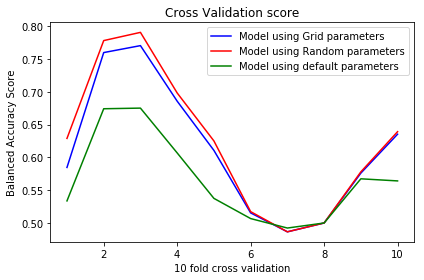

In [95]:
# plot to compare grid and random parameters
plt.plot([1,2,3,4,5,6,7,8,9,10], rfc_cv_score_g, label="Model using Grid parameters", color="blue")
plt.plot([1,2,3,4,5,6,7,8,9,10], rfc_cv_score_r, label="Model using Random parameters", color="red")
plt.plot([1,2,3,4,5,6,7,8,9,10], rfc_cv_score, label="Model using default parameters", color="green")
plt.title("Cross Validation score")
plt.ylabel("Balanced Accuracy Score")
plt.xlabel("10 fold cross validation")
plt.tight_layout()
plt.legend(loc="best")
plt.show()